## MILESTONE: 1

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
url = "C:/Users/tejat/Downloads/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables/Processed_RUSSELL.csv"
"C:/Users/tejat/Downloads/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables/Processed_S&P.csv"
"C:/Users/tejat/Downloads/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables/Processed_DJI.csv"
"C:/Users/tejat/Downloads/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables/Processed_NASDAQ.csv"
"C:/Users/tejat/Downloads/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables/Processed_NYSE.csv"
df = pd.read_csv(url)

# Inspect initial data
print("Initial DataFrame shape:", df.shape)
print(df.head())
print(df.dtypes)


Initial DataFrame shape: (1984, 84)
         Date       Close    Volume       mom      mom1      mom2      mom3  \
0  2009-12-31  625.390015       NaN       NaN       NaN       NaN       NaN   
1  2010-01-04  640.099976  0.921723  0.023521       NaN       NaN       NaN   
2  2010-01-05  638.489990 -0.375903 -0.002515  0.023521       NaN       NaN   
3  2010-01-06  637.950012  0.996234 -0.000846 -0.002515  0.023521       NaN   
4  2010-01-07  641.969971  0.059932  0.006301 -0.000846 -0.002515  0.023521   

   ROC_5  ROC_10  ROC_15  ...   NZD  silver-F  RUSSELL-F  S&P-F   CHF  \
0    NaN     NaN     NaN  ...  0.03      0.26      -1.08  -1.00 -0.11   
1    NaN     NaN     NaN  ...  1.52      3.26       1.61   1.62 -0.57   
2    NaN     NaN     NaN  ... -0.07      1.96      -0.20   0.31  0.43   
3    NaN     NaN     NaN  ...  0.56      2.15      -0.02   0.07 -0.56   
4    NaN     NaN     NaN  ... -0.72      0.94       0.50   0.40  0.58   

   Dollar index-F  Dollar index  wheat-F   XAG   X

In [7]:
# Drop non-numeric columns (e.g., 'Date')
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Drop non-numeric columns if they aren’t needed
df = df.drop(non_numeric_cols, axis=1)

Non-numeric columns: Index(['Date', 'Name'], dtype='object')


In [8]:
# Replace NaN values with column means or other imputation strategy
df.fillna(df.mean(), inplace=True)

print("DataFrame shape after cleaning:", df.shape)

print("Column names in the dataset:", df.columns)

DataFrame shape after cleaning: (1984, 82)
Column names in the dataset: Index(['Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5', 'ROC_10',
       'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200', 'DTB4WK',
       'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA', 'DBAA', 'GBP',
       'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM', 'MSFT', 'WFC',
       'XOM', 'FCHI', 'FTSE', 'GDAXI', 'DJI', 'HSI', 'IXIC', 'SSEC', 'S&P',
       'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2', 'DE4', 'DE5',
       'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'AUD', 'Brent', 'CAC-F', 'copper-F',
       'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F', 'gold-F', 'HSI-F',
       'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD', 'silver-F',
       'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F', 'Dollar index',
       'wheat-F', 'XAG', 'XAU'],
      dtype='object')


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features for CNN model
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Split the dataset into features (X) and target (y)
target_column = 'Close'  # Replace 'Close' with your actual target variable
X = df_scaled.drop(target_column, axis=1)
y = df_scaled[target_column]

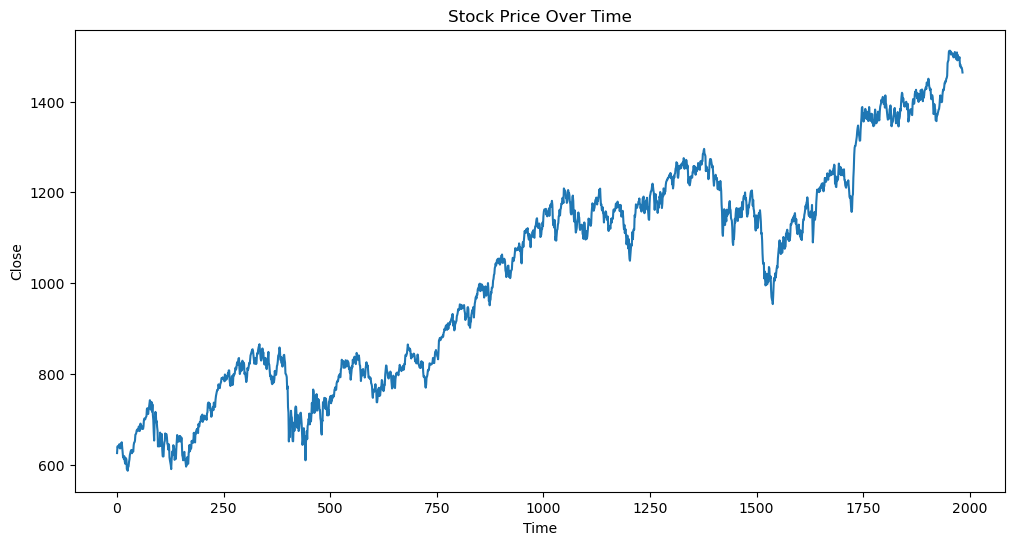

In [15]:
## Basic Data Visualization for Trends (Optional)
## This part is optional but useful for understanding the trends in stock prices

plt.figure(figsize=(12, 6))
plt.plot(df[target_column])
plt.title('Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel(target_column)
plt.show()
